In [2]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter

In [3]:
train_data_url = "https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv"
test_data_url = "https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv"

train_data = pd.read_csv(train_data_url)
test_data = pd.read_csv(test_data_url)

In [4]:
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [6]:
train_data.shape

(31647, 18)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [8]:
train_data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<Axes: >

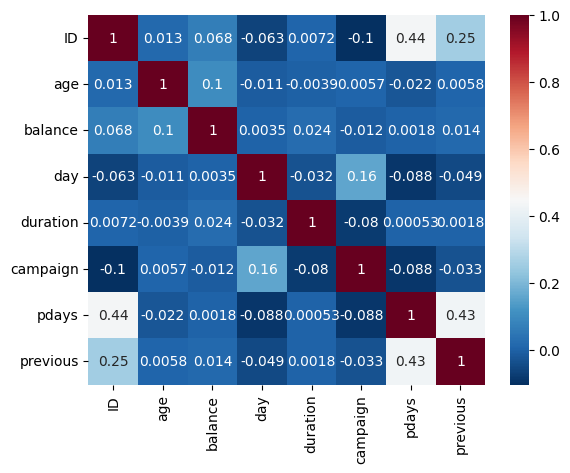

In [9]:
# Plotting Correlations

sns.heatmap(train_data._get_numeric_data().astype(float).corr(), cmap='RdBu_r', annot=True)

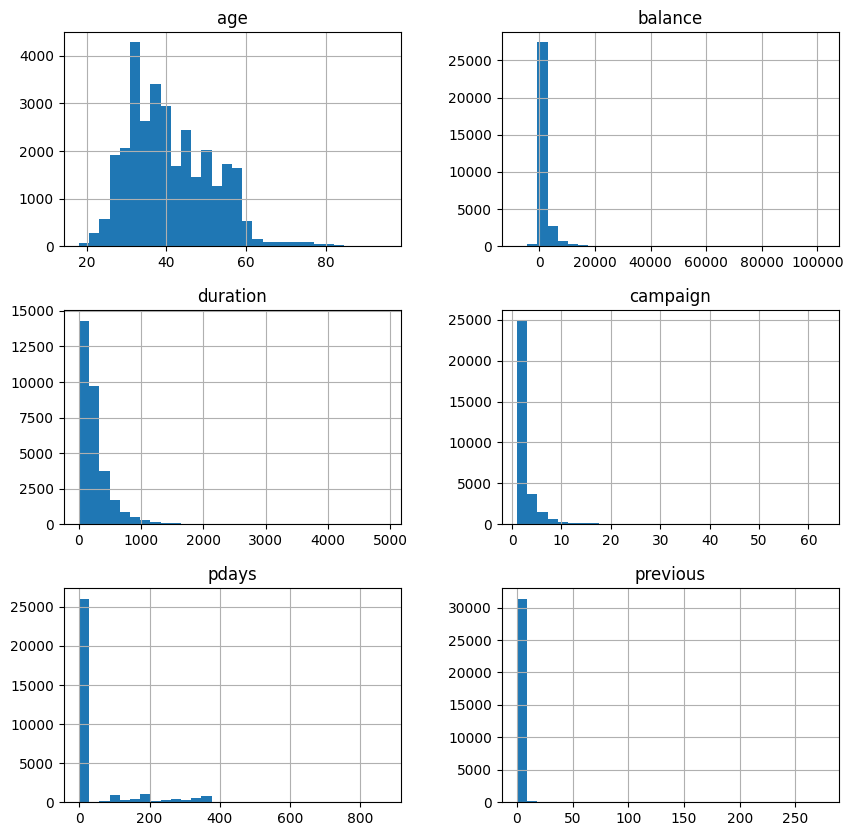

In [10]:
# Plotting numerical features ti understand the skenwess and variability of the variables

train_data[['age','balance','duration', 'campaign', 'pdays', 'previous']].hist(bins=30, figsize=(10,10))
plt.show()

In [11]:
print(train_data.isnull().sum()) # No null values

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [12]:
# Finding out top 5 highly successful campaigns

train_data.groupby(['campaign'])['subscribed'].count().reset_index().sort_values(by='subscribed', ascending=False).iloc[:5]

,campaign,subscribed
0,1,12262
1,2,8798
2,3,3858
3,4,2442
4,5,1245


In [13]:
# Separate the features and target variable

X = train_data.drop('subscribed', axis=1)
y = train_data['subscribed']

In [14]:
# One-hot encoding on categorical variables

X = pd.get_dummies(X, drop_first=True)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=123)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [21]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
# Predicting on the first value
print(logisticRegr.predict(X_val_scaled[0].reshape(1,-1)))

['no']


In [23]:
predictions = logisticRegr.predict(X_val_scaled)

In [27]:
score = logisticRegr.score(X_val_scaled, y_val)
print(score)

0.9051079515534491


In [28]:
# Confusion metrics

from sklearn import metrics
cm = metrics.confusion_matrix(y_val, predictions)
print(cm)

[[8164  231]
 [ 670  430]]


In [29]:
# Let's test the model on the testing data

X_test = pd.get_dummies(test_data, drop_first=True)
X_test_scaled = scaler.transform(X_test)

In [30]:
test_predictions = logisticRegr.predict(X_test_scaled)

In [35]:
score = logisticRegr.score(X_test_scaled, test_predictions)
print(score)

# Since, the data is not invisible to the model, thus the model has predicted at the highest level of accuracy

1.0
